In [3]:
import ROOT
import math
from IPython.display import  Audio
sound_file= 'sounds/dscybsit.wav'

In [5]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/dstar_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 0.14, 0.16)
x_range = [0.14, 0.16]
bin_widht = 2e-4
n_bins = int((x_range[1] - x_range[0]) / bin_widht)
mass.setBins(250)

data = ROOT.RooDataSet("data", "", file.Dstar, ROOT.RooArgSet(mass))

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [6]:
## Signal definition

# Gaussian 1
frac_g1 = ROOT.RooRealVar("frac g1", "", 0.18, 0.0, 1.0)
mean = ROOT.RooRealVar("mean","", 0.1455, 0.14, 0.16)
sigma_g1 = ROOT.RooRealVar("sigma g1", "", 0.0002, 0.00001, 1.0)

# Gaussian 2
frac_g2 = ROOT.RooRealVar("frac g2", "", 0.25, 0.0, 1.0)
sigma_g2 = ROOT.RooRealVar("sigma g2", "", 0.0004, 0.00001, 1.0)

# Pdfs

gauss1 = ROOT.RooGaussian("gauss 1", "", mass, mean, sigma_g1)
gauss2 = ROOT.RooGaussian("gauss 2", "", mass, mean, sigma_g2)

In [7]:
## Background

# Phenomenological threshold function

p0 = ROOT.RooRealVar("pzeroz","", 2.7e-3, 0.001, 5)
p1 = ROOT.RooRealVar('pone',"", -2.4e-1, -4, 4)
p2 = ROOT.RooRealVar('ptwo',"", 5, 3, 6)
#
back = ROOT.RooGenericPdf("Phen thrs func","","(1 - exp(-(@0 -0.13957)/@1)) * (@0/0.13957)**@2 + @3 * (@0/0.13957 - 1)", ROOT.RooArgList(mass,p0,p1,p2))

In [8]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss1, gauss2, back),
                       ROOT.RooArgList(frac_g1, frac_g2), ROOT.kTRUE)

#model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss1, gauss2),
#                     ROOT.RooArgList(yield_g1, yield_g2))

In [9]:
result = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss 1,gauss 2,Phen thrs func)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac g1      1.80000e-01  9.00000e-02    0.00000e+00  1.00000e+00
     2 frac g2      2.50000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 mean         1.45500e-01  2.00000e-03    1.40000e-01  1.60000e-01
     4 pone        -2.40000e-01  8.00000e-01   -4.00000e+00  4.00000e+00
     5 ptwo         5.00000

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss 1,gauss 2,model_recursive_fraction_gauss 2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (Phen thrs func)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Phen thrs func_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)


Info in <TCanvas::Print>: png file Dstar_fit.png has been created


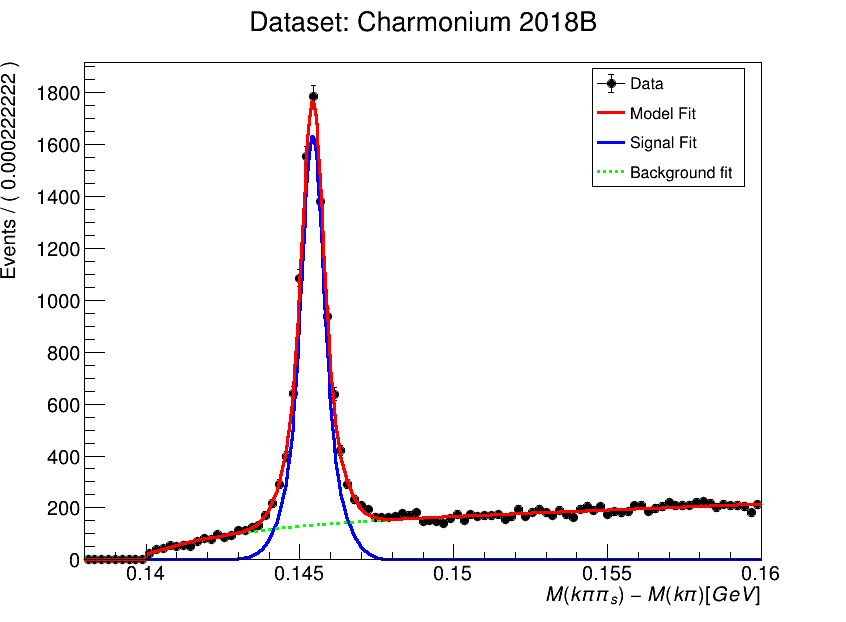

In [10]:
## Plots - Normal scale

# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

# Canvas Definition
can = ROOT.TCanvas("can", "histograms", 850, 650)

# Frame creation
frame1 = mass.frame(ROOT.RooFit.Title("Dataset: Charmonium 2018B"), ROOT.RooFit.Bins(99))
frame1.GetXaxis().SetTitle("M(k\pi\pi_s) - M(k\pi) [GeV]")
frame1.GetXaxis().SetLimits(0.138, 0.16)


# Data
data.plotOn(frame1, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Signal
model.plotOn(frame1, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components("*gauss*"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame1, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("Phen thrs func"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

# Model
model.plotOn(frame1, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

## ChiSquare computation
n_param = result.floatParsFinal().getSize()
reduce_chi_square = frame1.chiSquare(n_param)

## Legends

leg = ROOT.TLegend(0.7, 0.7, 0.88, 0.89)
leg.AddEntry(frame1.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame1.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame1.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame1.findObject("Background"), "Background fit", "L")

frame1.Draw()
leg.Draw("same")

can.Draw()

can.SaveAs("Dstar_fit.png")

Info in <TCanvas::Print>: png file Dstar_fit_yaxislog.png has been created


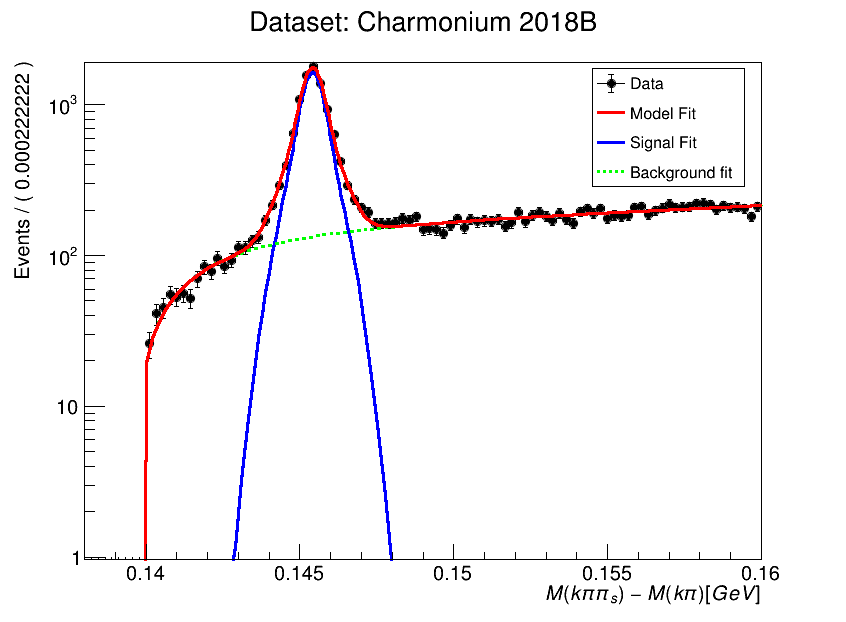

In [10]:
# Log plot
ROOT.gPad.SetLogy()

can.Draw()

can.SaveAs("Dstar_fit_yaxislog.png")

In [15]:
## yields computation

# M = fgauss1 * Gaussian1 + (1 - fgauss1) [fgauss2 * Gaussian2 + (1 - fgauss2) * PTF]

# Number of signal events: Nsignal = Ntotal * [fgauss1 + (1 - fgauss1) * fgauss2]
nsignal = data.sumEntries() * (frac_g1.getVal() + (1 - frac_g1.getVal()) * frac_g2.getVal())

# Number of background events: Nback = Ntotal (1 - fgauss) * (1 - fcrystall) * fexponential
# or Ntotal - Nsignal
nbackground = data.sumEntries() * (1 - frac_g1.getVal()) * (1 - frac_g2.getVal())
r'$\alpha > \beta$'
print("The number of signal events is: {}".format(nsignal))
print("The number of background events is: {}".format(nbackground))
print("The number of s/sqrt(b) is : {}".format(nsignal/math.sqrt(nbackground)))

The number of signal events is: 8356.930380483464
The number of background events is: 13932.069619516536
The number of s/sqrt(b) is : 70.8009306225851


[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 0 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 1 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 2 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 3 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 4 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 5 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 6 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 7 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(Data) WARNING: point 8 has zero error, setting residual 

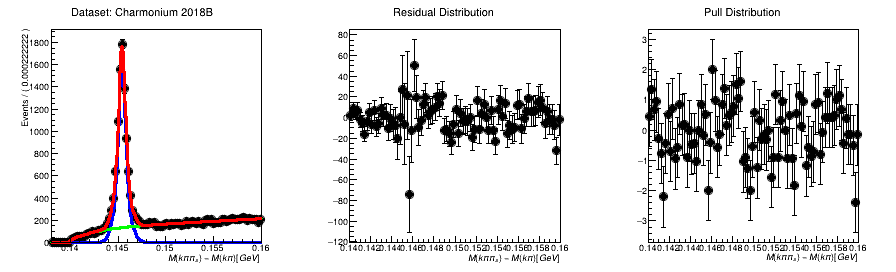

In [12]:
# Takes pull and residual histograms
histpull = frame1.pullHist()
histresid = frame1.residHist()

# New frame to draw residual distribution
frame2 = mass.frame(ROOT.RooFit.Title("Residual Distribution"))
frame2.GetXaxis().SetTitle("M(k\pi\pi_s) - M(k\pi) [GeV]")

# Add the distribution to the frame
frame2.addPlotable(histresid, "P") 

# New frame to draw pull distribution
frame3 = mass.frame(ROOT.RooFit.Title("Pull Distribution"))
frame3.GetXaxis().SetTitle("M(k\pi\pi_s) - M(k\pi) [GeV]")

# Add the distribution to the frame
frame3.addPlotable(histpull, "P")

# New canvas to draw our distributions
can2 = ROOT.TCanvas("can2", "Residual_pull", 900, 300)
can2.Divide(3)

# Plot for data and fit
can2.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.6)
frame1.Draw()

# Plot for residual distribution
can2.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()

# Plot for pull distribution

can2.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()

can2.Draw()

In [12]:
# To save workspace
wspace = ROOT.RooWorkspace("Dstar fit")

getattr(wspace, "import")(data)
getattr(wspace, "import")(model)

wspace.writeToFile("Dstar_fit.root")

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing dataset data
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooGaussian::gauss 1
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::mean
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::sigma g1
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::frac g1
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooGaussian::gauss 2
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRealVar::sigma g2
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooRecursiveFraction::model_recursive_fraction_gauss 2
[#1] INFO:ObjectHandling -- RooWorkspace::import(Dstar fit) importing RooReal

In [13]:
Audio(sound_file, autoplay=True)